# Regression for Various Ranges
In this file we will conduct regression for various ranges of the ArrDelayMinutes
#### Objectives
1. Read the Final Merged Data
2. Label Encode the columns which need label Encoding - ("Origin", "Dest")
3. Define the Variables X and Y and then split them into test and train respectively.
4. Train our model using XGBoost and the train and test datasets
5. Filter out the dataframe for various ranges, and then predict the delay for these ranges. The ranges being:
    1. 15-100
    2. 100-200
    3. 200-500
    4. 500-1000
    5. 1000+

###### Regression Model Used
1. REGRESSOR - XGboost Regressor [LOOKUP](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

In [1]:
# First let us import all the different libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

#### Looking at the dataframe
Let us look at the dataframe for a little bit of insight into the data

In [2]:
# Readinbg the file 
df = pd.read_csv("Data/Merged_Flight_Weather.csv")
df.head()

,Unnamed: 0,index_x,ArrDel15,ArrDelayMinutes,ArrTime,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,date,airport
0,0,0,0.0,8.0,1610.0,1602,745,1,0.0,0.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
1,1,12608,1.0,33.0,1237.0,1204,820,1,0.0,1.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
2,2,50768,0.0,0.0,1138.0,1143,759,1,0.0,0.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
3,3,51023,0.0,10.0,1401.0,1351,738,1,0.0,2.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
4,4,61167,0.0,0.0,1524.0,1527,745,1,0.0,0.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA


In [3]:
# We look at the colums first then the shape
df.columns

Index(['Unnamed: 0', 'index_x', 'ArrDel15', 'ArrDelayMinutes', 'ArrTime',
       'CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes',
       'DepTime', 'Dest', 'DestAirportID', 'FlightDate', 'Month', 'Origin',
       'OriginAirportID', 'Quarter', 'Year', 'DeptTime', 'index_y',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'time', 'date', 'airport'],
      dtype='object')

In [4]:
# Now the shape of the dataframe
df.shape

(1851091, 36)

In [5]:
# Check for missing values
df.isna().sum()

Unnamed: 0         0
index_x            0
ArrDel15           0
ArrDelayMinutes    0
ArrTime            0
CRSArrTime         0
CRSDepTime         0
DayofMonth         0
DepDel15           0
DepDelayMinutes    0
DepTime            0
Dest               0
DestAirportID      0
FlightDate         0
Month              0
Origin             0
OriginAirportID    0
Quarter            0
Year               0
DeptTime           0
index_y            0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
time               0
date               0
airport            0
dtype: int64

In [6]:
# Let us drop the columns that are unnecessary
df = df.drop(columns=['Unnamed: 0', 'index_x', 'time', 'date', 'FlightDate', 'index_y', 'DeptTime', 'airport', 'ArrTime'])

In [7]:
df.columns

Index(['ArrDel15', 'ArrDelayMinutes', 'CRSArrTime', 'CRSDepTime', 'DayofMonth',
       'DepDel15', 'DepDelayMinutes', 'DepTime', 'Dest', 'DestAirportID',
       'Month', 'Origin', 'OriginAirportID', 'Quarter', 'Year',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity'],
      dtype='object')

In [8]:
df.shape

(1851091, 27)

In [9]:
df.duplicated().sum()

66

### Label Encoding using sklearn.LabelEncoder
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
Here we are label encoding the `Origin` and the `Dest` features, by first converting them to category type and then using `sklearn.preprocessing.LabelEncoder` : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [10]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df['Origin'] = label.fit_transform(df['Origin'])
df['Dest'] = label.fit_transform(df['Dest'])
df.dtypes

ArrDel15           float64
ArrDelayMinutes    float64
CRSArrTime           int64
CRSDepTime           int64
DayofMonth           int64
DepDel15           float64
DepDelayMinutes    float64
DepTime            float64
Dest                 int32
DestAirportID        int64
Month                int64
Origin               int32
OriginAirportID      int64
Quarter              int64
Year                 int64
windspeedKmph        int64
winddirDegree        int64
weatherCode          int64
precipMM           float64
visibility           int64
pressure             int64
cloudcover           int64
DewPointF            int64
WindGustKmph         int64
tempF                int64
WindChillF           int64
humidity             int64
dtype: object

As you can see those both Origin and airport have been converted into category type

In [11]:
df.Origin.value_counts()

8     209321
14    166932
11    153438
0     146723
2     144149
7     132154
3     125904
13    115707
12    114012
4     100170
9      99568
6      93436
5      89551
1      83486
10     76540
Name: Origin, dtype: int64

In [12]:
df.Dest.value_counts()

8     210165
14    166526
11    153557
0     147719
2     142357
7     132378
3     125463
13    115822
12    113795
4     100437
9      99622
6      93441
5      89782
1      83405
10     76622
Name: Dest, dtype: int64

Another way for label encoding is to use `cat.codes` [LOOKUP](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

The code would look something like
```python
# To convert our variables to categories
df["Origin"] = df["Origin"].astype('category')
df["Dest"] = df["Dest"].astype('category')
# To see if our features have convered to category
df.dtypes
# Converting the categorical variables to labels
df["Origin"] = df["Origin"].cat.codes
df["Dest"] = df["Dest"].cat.codes
```


##### Feature exploration
Since there are no missing values or categorical variables we can continue further and look at the corellation between various features of the dataframe

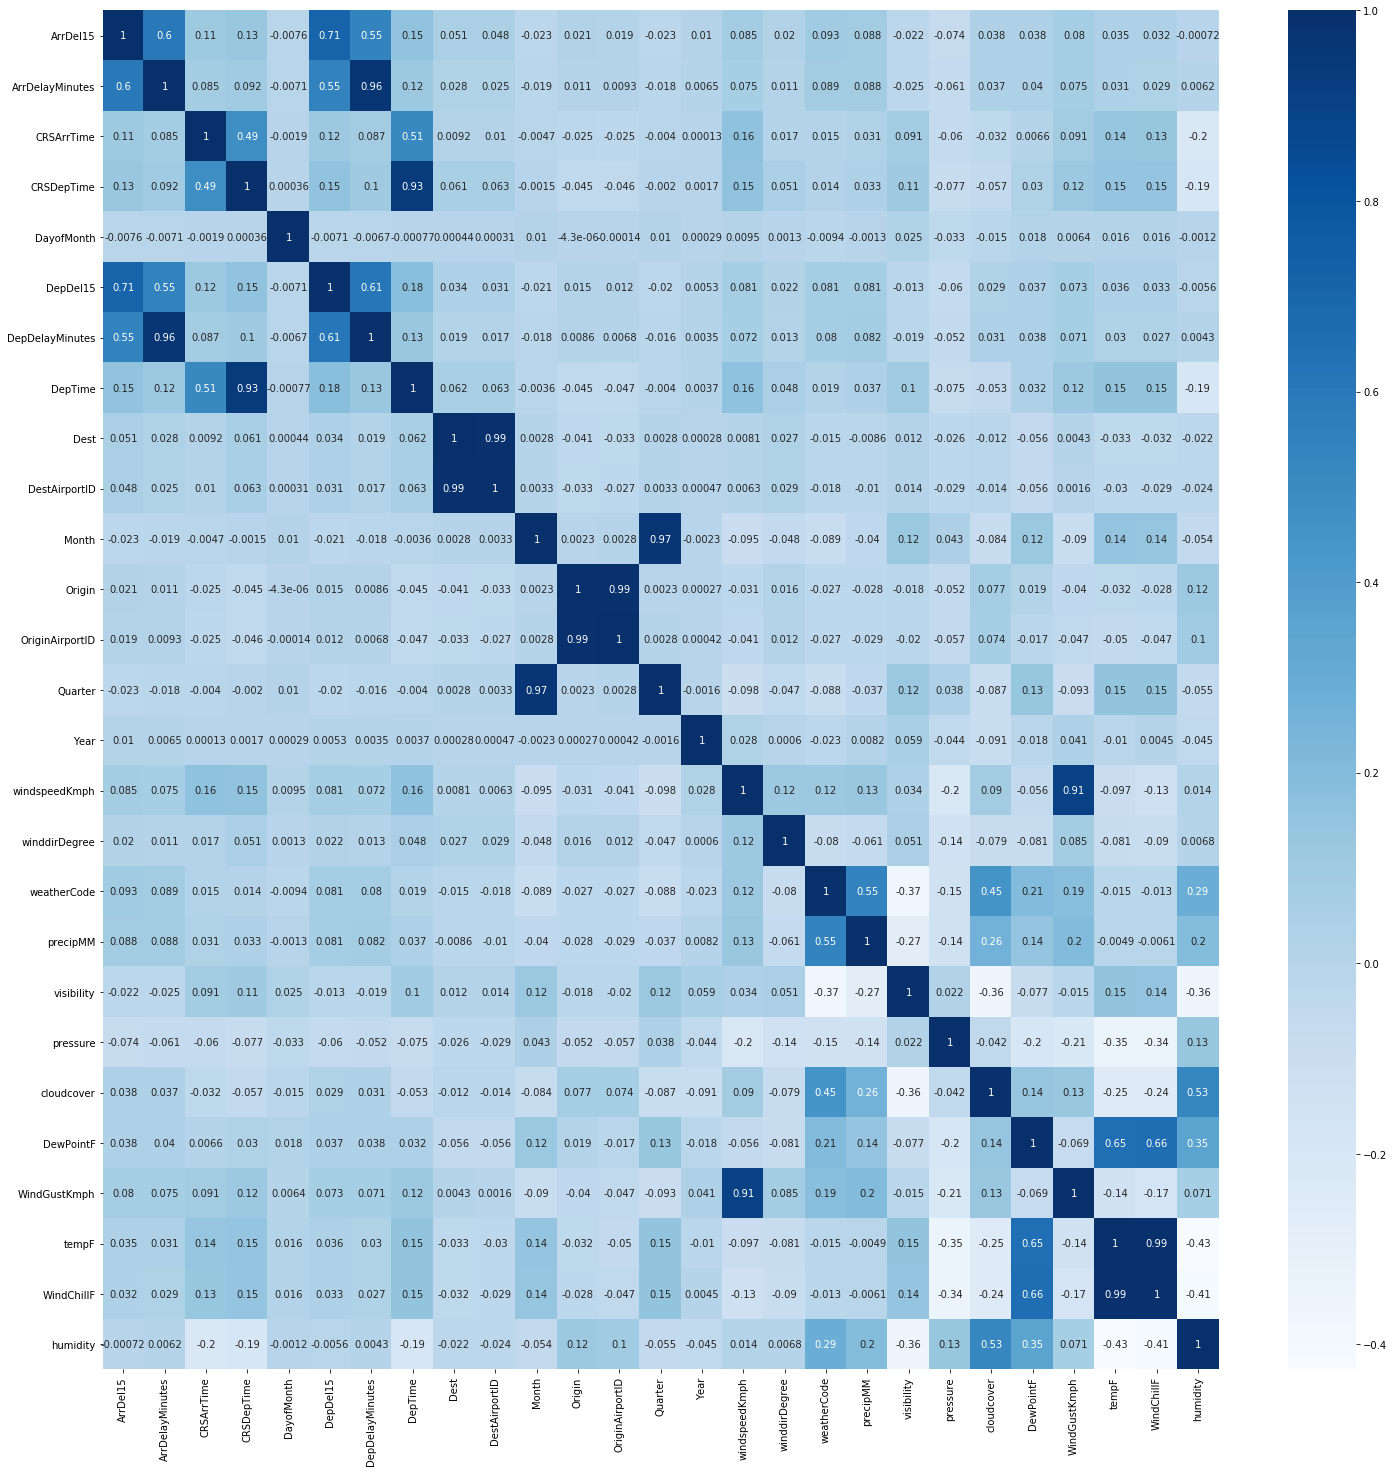

In [13]:
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

In [14]:
df.corr()

,ArrDel15,ArrDelayMinutes,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,Dest,DestAirportID,...,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity
ArrDel15,1.000000,0.603637,0.110609,0.127250,-0.007591,0.710541,0.546146,0.154332,0.051251,0.048179,...,0.092634,0.088453,-0.021847,-0.073884,0.037856,0.038140,0.080305,0.035392,0.031994,-0.000722
ArrDelayMinutes,0.603637,1.000000,0.085111,0.092222,-0.007079,0.550232,0.964964,0.117292,0.027922,0.025159,...,0.088526,0.088020,-0.024795,-0.061076,0.036748,0.040083,0.075440,0.031069,0.028560,0.006215
CRSArrTime,0.110609,0.085111,1.000000,0.487283,-0.001900,0.118578,0.086948,0.513796,0.009236,0.010087,...,0.015100,0.030531,0.091265,-0.060435,-0.032327,0.006616,0.090935,0.141935,0.132120,-0.204943
CRSDepTime,0.127250,0.092222,0.487283,1.000000,0.000361,0.154995,0.104767,0.934012,0.061113,0.062899,...,0.013539,0.032853,0.105887,-0.077360,-0.057290,0.030096,0.115162,0.146887,0.147579,-0.191060
DayofMonth,-0.007591,-0.007079,-0.001900,0.000361,1.000000,-0.007061,-0.006680,-0.000770,0.000438,0.000314,...,-0.009418,-0.001258,0.025224,-0.032987,-0.015197,0.018075,0.006411,0.016333,0.015829,-0.001191
DepDel15,0.710541,0.550232,0.118578,0.154995,-0.007061,1.000000,0.608083,0.183915,0.033677,0.031405,...,0.080544,0.080526,-0.012641,-0.060214,0.029349,0.036909,0.072550,0.036080,0.033099,-0.005638
DepDelayMinutes,0.546146,0.964964,0.086948,0.104767,-0.006680,0.608083,1.000000,0.127724,0.019072,0.016697,...,0.079583,0.081940,-0.019313,-0.052186,0.031329,0.038023,0.071244,0.029619,0.027398,0.004273
DepTime,0.154332,0.117292,0.513796,0.934012,-0.000770,0.183915,0.127724,1.000000,0.061815,0.063402,...,0.018801,0.036956,0.102771,-0.075017,-0.053261,0.031683,0.118261,0.150889,0.149697,-0.193536
Dest,0.051251,0.027922,0.009236,0.061113,0.000438,0.033677,0.019072,0.061815,1.000000,0.993752,...,-0.015492,-0.008630,0.011779,-0.025931,-0.011565,-0.056141,0.004309,-0.032825,-0.031778,-0.021596
DestAirportID,0.048179,0.025159,0.010087,0.062899,0.000314,0.031405,0.016697,0.063402,0.993752,1.000000,...,-0.017934,-0.010313,0.013518,-0.028700,-0.013602,-0.055771,0.001645,-0.029962,-0.028681,-0.023833


## TRAINING OUT REGRESSOR
Here we will be splitting out data set and training our XGBoost regressor for regression in the following kernels of code. We will also evaluvate our Regressor's performance using inbuilt metrics

#### Filtering the data
We will only be looking at those flights which arrived late because it will be redundant to predict the delay in muntes for flights that have not arrived late.

In [15]:
# Looking at only those flights that arrived late
df = df[df.ArrDel15 == 1.0]
y = df['ArrDelayMinutes']
X = df.drop(columns = ['ArrDelayMinutes', 'ArrDel15'])

In [16]:
# Looking at the features
X.columns

Index(['CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes',
       'DepTime', 'Dest', 'DestAirportID', 'Month', 'Origin',
       'OriginAirportID', 'Quarter', 'Year', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity'],
      dtype='object')

In [17]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 123)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((291000, 25), (97000, 25), (291000,), (97000,))

### Metrics used
To evaluvate our model we will be looking at a few metrics, namely

1. Mean Absolute Error  (MAE): Mean absolute error is a measure of errors between paired observations expressing the same phenomenon.

$$MAE = \frac{1}{n}\sum \limits _{i=1} ^{n} |y_{i} - \hat{y}| $$

2. Mean Squared Error(MSE): The mean squared error or mean squared deviation of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.

$$MSE = \frac{1}{N}\sum \limits _{i=1} ^{n} (y_{i} - \hat{y})^2 $$

3. Root Mean Squared Error (RMSE) : Essentially the root of MSE

$$RMSE = \sqrt{\frac{1}{N}\sum \limits _{i=1} ^{n} (y_{i} - \hat{y})^2} $$


4. Coefficient of Determination ($ R^2 $): The coefficient of determination, denoted R² or r² and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable.

$${R^2} = \frac{VAR(X, Y)_(fitted line)}{VAR(X, Y)mean}$$

### PREDICTION

## XGboost Regressor

In [19]:
from xgboost import XGBRegressor
xgboost_regressor = XGBRegressor()
xgboost_regressor.fit(X_train,y_train)
y_pred_xgboost = xgboost_regressor.predict(X_test)

In [20]:
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_xgboost) 
MSE=metrics.mean_squared_error(y_test, y_pred_xgboost) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test, y_pred_xgboost)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 11.28912299615329
MSE: 270.3819590611851
RMSE: 16.443295261631263
R-Squared: 0.949281285505067


###### METHOD FOR REGRESSION ANALYSIS FOR DIFFERENT RANGES
1. Filter out the data only for the required ranges and save it to another dataframe.
2. Use this dataframe to define our independent and Dependent variables (X and Y)
3. Use X to predict the delay in minutes for the given range
4. Compare it to our dependent Variable Y and evaluvate our performance using in-built metrics

But all the process above is repetitive for every range and it wouldn't make sense to rewrite the code again and again. Therefore we will now define a function that follows the method mentioned above

In [28]:
df["ArrDelayMinutes"].max()

2142.0

In [30]:
def regression_range(lowerlimit, upperlimit = 2142.0):
    
    # Filtering our those flights that are delayed after the lowelimit in minutes
    df_temp1 = df[df.ArrDelayMinutes >= lowerlimit]
    # Filtering our those flights that are delayed before the upperlimit in minutes
    df_temp = df[df.ArrDelayMinutes <= upperlimit+1]
    
    # Defining the dependent and independent variables
    dependent_variable = df_temp["ArrDelayMinutes"]
    independent_variable = df_temp.drop(columns = ['ArrDelayMinutes', 'ArrDel15'])
    
    # Using our pretrained model to predict the number of minutes by which flights in this range will be delayed 
    y_pred_xgboost_temp = xgboost_regressor.predict(independent_variable)
    
    # Using in built metrics to evaluvate our model
    mean_absolute_error=metrics.mean_absolute_error(dependent_variable, y_pred_xgboost_temp) 
    MSE=metrics.mean_squared_error(dependent_variable, y_pred_xgboost_temp) 
    RMSE= np.sqrt(MSE)
    R2=metrics.r2_score(dependent_variable, y_pred_xgboost_temp)
    print("MAE: {}".format(mean_absolute_error))
    print("MSE: {}".format(MSE))
    print("RMSE: {}".format(RMSE))
    print("R-Squared: {}".format(R2))

**Regression for the range 15-100**

In [31]:
regression_range(15, 100)

MAE: 21.7963140040475
MSE: 537.4217949704653
RMSE: 23.182359564342566
R-Squared: -0.6581765295410753


**Regression for the range 100-200**

In [32]:
regression_range(100, 200)

MAE: 21.66398577363092
MSE: 539.9286424264187
RMSE: 23.23636465599597
R-Squared: 0.287233395586728


**Regression for the range 200-500**

In [33]:
regression_range(200, 500)

MAE: 21.629342821720805
MSE: 541.4771267077705
RMSE: 23.26966107848953
R-Squared: 0.5821107273119832


**Regression for the range 500-1000**

In [34]:
regression_range(500, 1000)

MAE: 21.624790414709153
MSE: 541.4132233384635
RMSE: 23.26828793311754
R-Squared: 0.658225326603187


**Regression for the range 1000+**

In [35]:
regression_range(1000)

MAE: 21.62464284464395
MSE: 541.6472682770396
RMSE: 23.273316658290018
R-Squared: 0.6845693827788496
